In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

In [18]:
##Make this different for different root files
uproot_thing = uproot.open("/home/submit/caitl961/FCCAnalyzer/analyses/output_h_bb_40GeV_kkmcee.root")
print(uproot_thing.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow;1', 'wzp6_ee_nunuH_Hbb_ecm240/muon1_p;1', 'wzp6_ee_nunuH_Hbb_ecm240/muon2_p;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_p_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/acolinearity_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_m;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_no

The histograms are saved as `process_name/histogram_name`. We will now plot the Z peak after all the cuts (stored in `zll_m_cut4`) for the main `wzp6_ee_mumu_ecm91p2` process:

In [3]:
hqq_zmumu = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/hqq_m'].to_hist()
#z_mumu = z_mumu[::2j] # rebin with factor of 2

(0.0, 160.0)

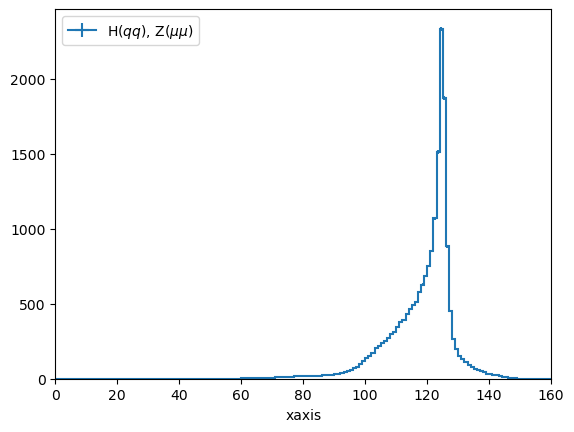

In [45]:
hep.histplot([hqq_zmumu], label=[r'H($qq$), Z($\mu\mu$)'])
plt.legend()
plt.xlim(0,160)
#plt.yscale("log")

To know the number of events in the histogram, we use the `.sum()` function. It returns an object containing two values: `.value` and `.variance`.

In [5]:
n_events_qq = hqq_zmumu.sum()
print("Total number of events:",n_events_qq.value)

Total number of events: 19311.988800000006


Let's get some backgrounds as well, for now we'll consider tau (`wzp6_ee_tautau_ecm91p2`) and the hadronic final states (`wzp6_ee_qq_ecm91p2`):

In [10]:
hqq_zee = uproot_thing['wzp6_ee_eeH_Hbb_ecm240/hqq_m'].to_hist()
#z_tautau = z_tautau[::2j]
hqq_ztautau = uproot_thing['wzp6_ee_tautauH_Hbb_ecm240/hqq_m'].to_hist()
#z_qq = z_qq[::2j]
hqq_ww=uproot_thing['p8_ee_WW_ecm240/hqq_m'].to_hist()
hqq_zz=uproot_thing['p8_ee_ZZ_ecm240/hqq_m'].to_hist()

And let's plot them stacked:

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: invalid value encountered in divide
  counts = sumw / scale
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


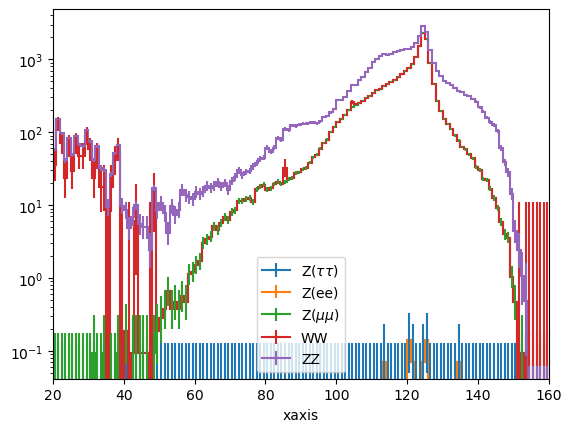

In [47]:
hep.histplot([hqq_ztautau, hqq_zee, hqq_zmumu,hqq_ww, hqq_zz], label=[r'Z($\tau\tau$)', r'Z(ee)', r'Z($\mu\mu$)', r'WW', r'ZZ'], stack=True)
plt.legend()
plt.xlim(20,160)
plt.yscale("log")

In [14]:
hqq_cutFlow = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/cutFlow'].to_hist()


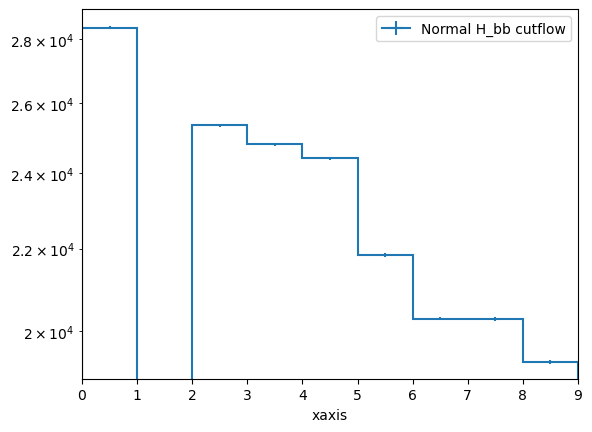

In [48]:
hep.histplot([hqq_cutFlow], label=['Normal H_bb cutflow'])
plt.legend()
plt.xlim(0,9)
plt.yscale("log")

In [19]:
hqq_mu1p = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/muon1_p'].to_hist()
hqq_mu2p = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/muon2_p'].to_hist()

(20.0, 85.0)

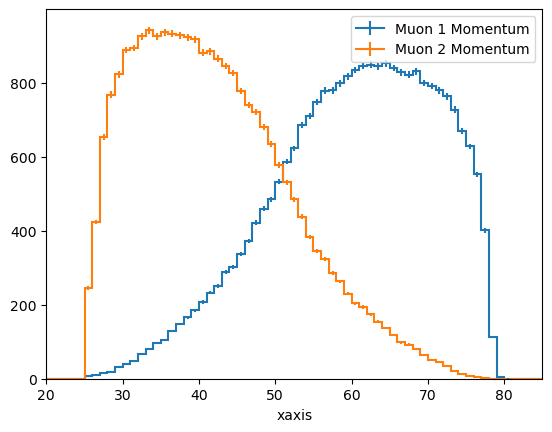

In [43]:
hep.histplot([hqq_mu1p, hqq_mu2p], label=['Muon 1 Momentum', 'Muon 2 Momentum'])
plt.legend()
plt.xlim(20,85)
#plt.yscale("log")

In [27]:
hqq_recoil = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()


(80.0, 170.0)

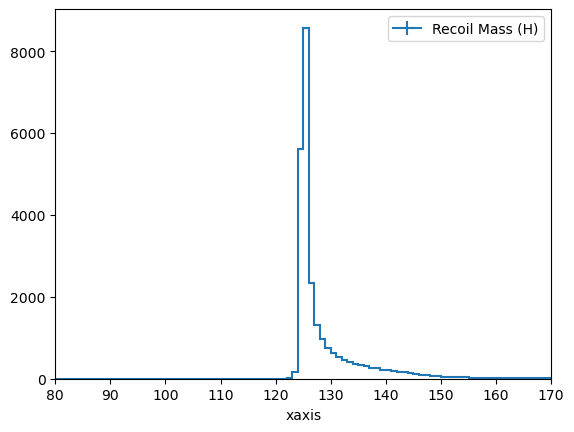

In [41]:
hep.histplot([hqq_recoil], label=['Recoil Mass (H)'])
plt.legend()
plt.xlim(80,170)
#plt.yscale("log")

In [62]:
hqq_zm = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/zmumu_m_nOne'].to_hist()

(80.0, 100.0)

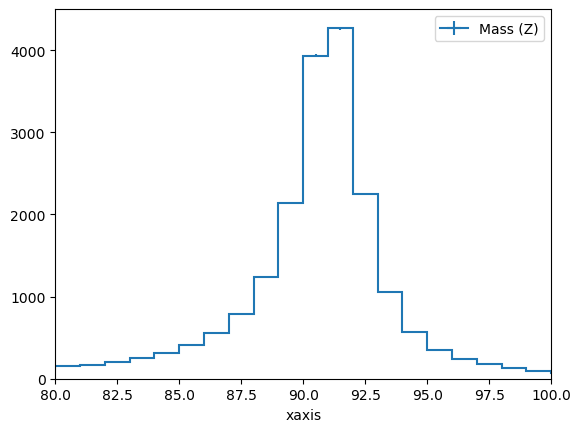

In [63]:
hep.histplot([hqq_zm], label=['Mass (Z)'])
plt.legend()
plt.xlim(80,100)
#plt.yscale("log")

In [64]:
hqq_mu_q = uproot_thing['wzp6_ee_mumuH_Hbb_ecm240/muons_all_q_cut0'].to_hist()

(-2.0, 3.0)

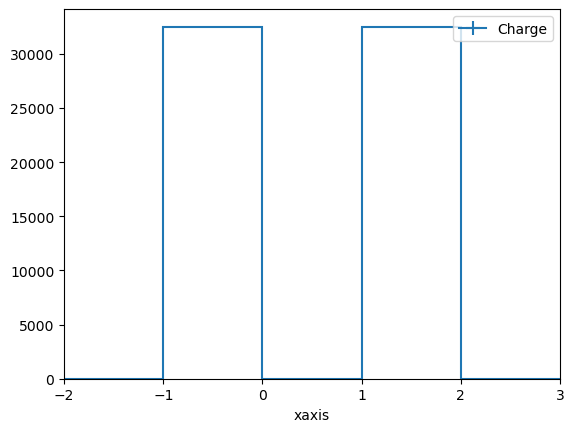

In [67]:
hep.histplot([hqq_mu_q], label=['Charge'])
plt.legend()
plt.xlim(-2, 3)
#plt.yscale("log")